<h1>The Best Neighborhood to Start a Family</h1>
<h2>By Eli Gach, Aiden McHugh, Trey Hutson

When parents are starting a family, there are many factors to consider. For example, they may find the quality of schools important or the number of other kids in the neighborhood. However, our group chose to focus on three specific metrics to come to our conclusion.

<h2>Metric #1: Availability of Parks</h2>

Parks are important social spaces for kids to connect with their peers. They also lead to increased physical activity and other physical or mental health benefits. 

In [13]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
file_path = 'https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d'
parks = pd.read_csv(file_path)

In [14]:
parks = parks[parks["type"]=="Park"]
num_parks = parks["neighborhood"].value_counts().reset_index()
num_parks.columns = ["neighborhood", "park_count"]

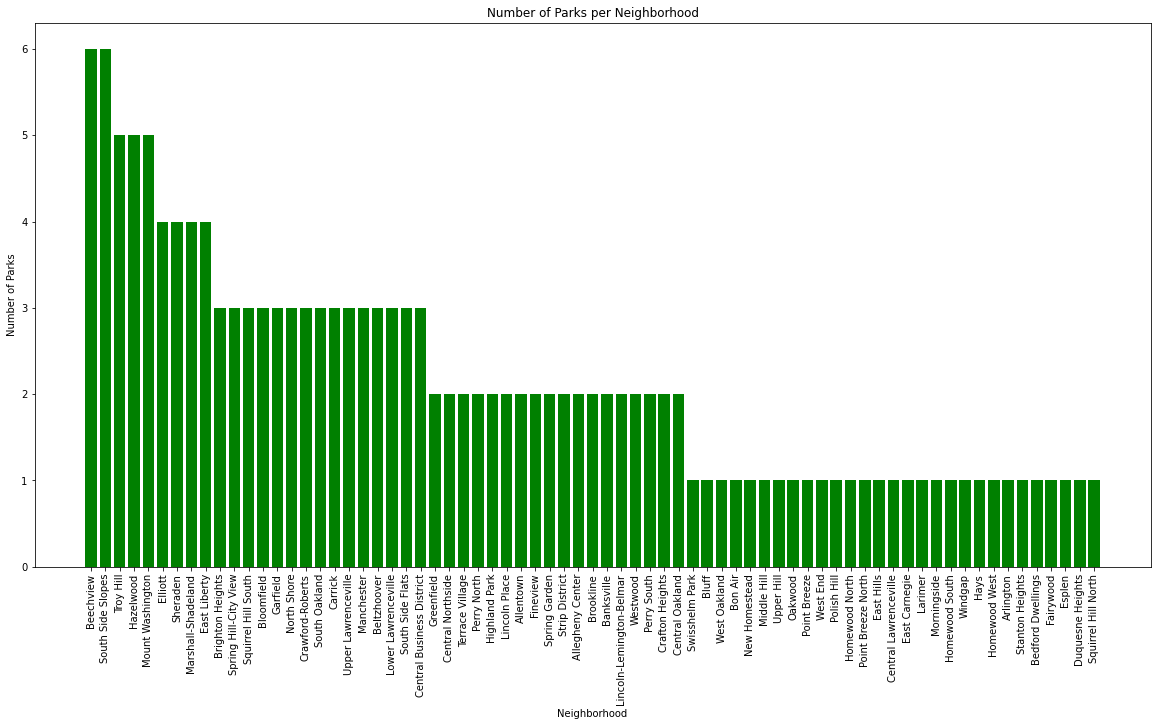

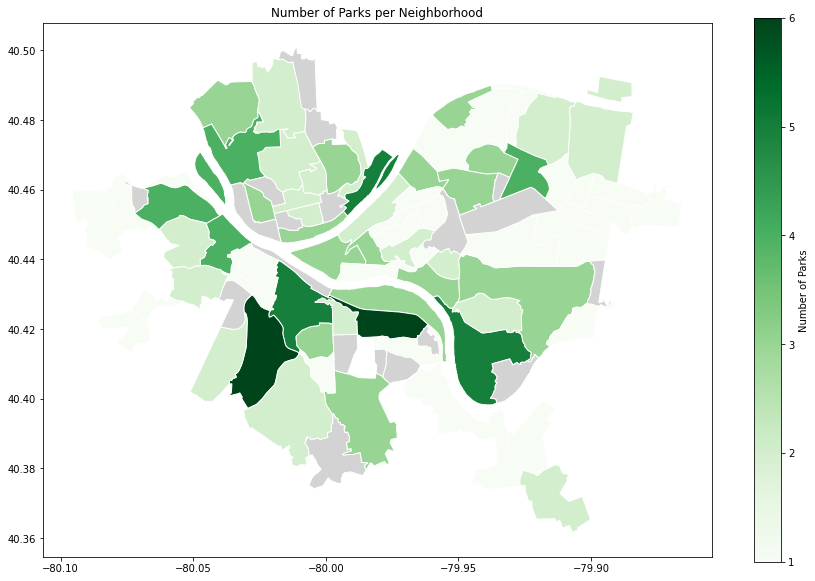

In [15]:
plt.figure(figsize = (20,10))
plt.bar(num_parks["neighborhood"], num_parks["park_count"], color = "green")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")
plt.title("Number of Parks per Neighborhood")
plt.xticks(rotation = 90)
plt.show()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
park_map = neighborhoods.merge(num_parks, how="left", left_on="hood", right_on="neighborhood")
park_map.plot(column='park_count',
               cmap='Greens',              
               edgecolor="white",      
               legend=True,              
               legend_kwds={'label': "Number of Parks"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )
plt.title("Number of Parks per Neighborhood")
plt.show()

The above map and bar chart shows that the Beechview and South Side Slopes neighborhoods have the highest number of parks in Pittsburgh. However, these charts do not take population into account.

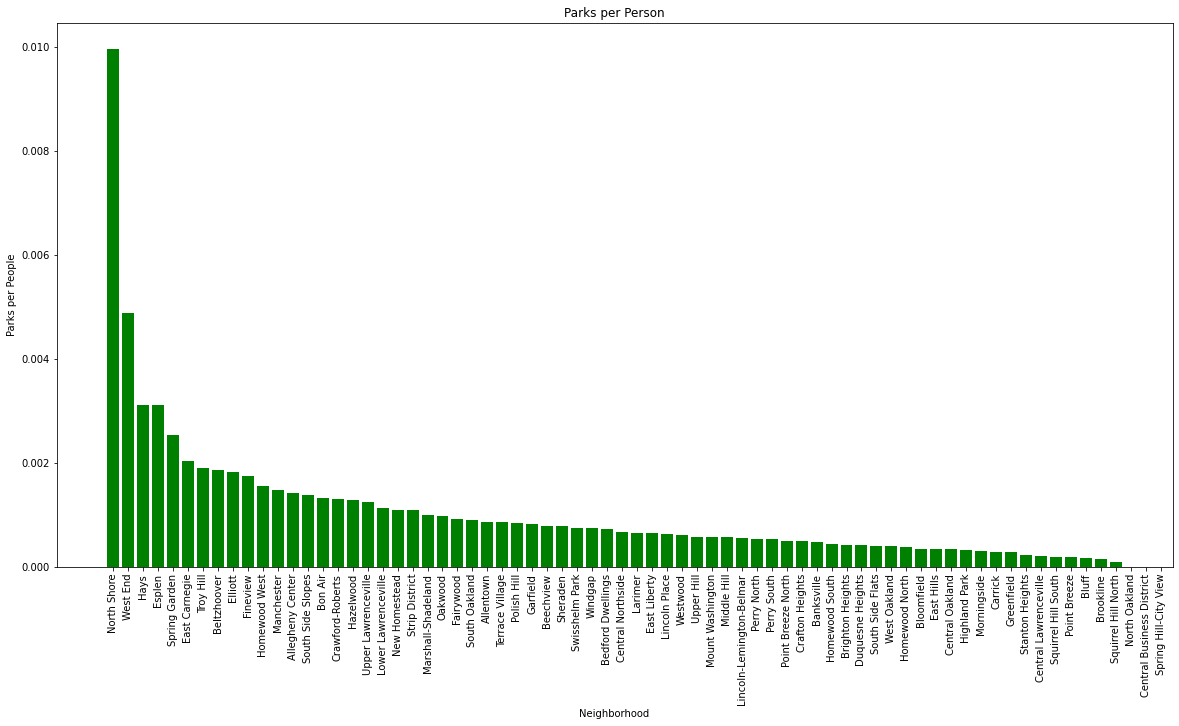

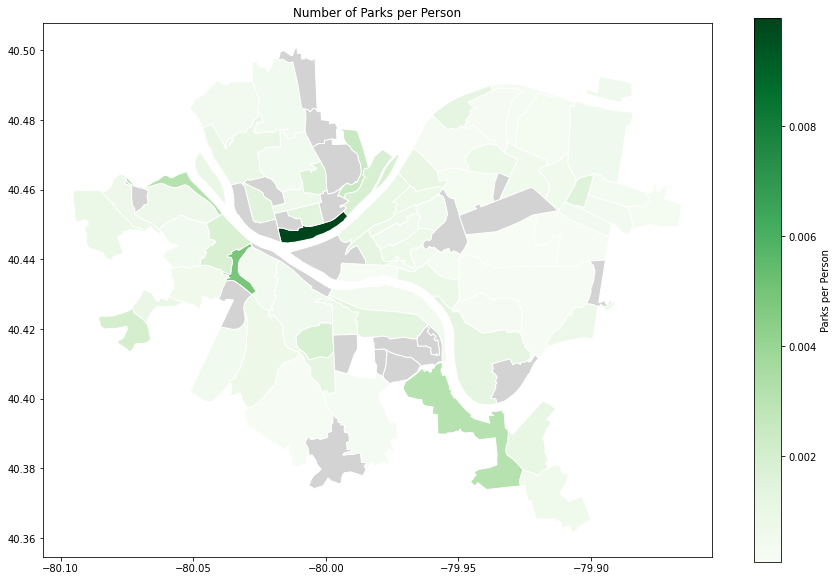

In [22]:
populations = pd.read_csv("https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/a8414ed5-c50f-417e-bb67-82b734660da6/download/preliminarycitypittsburghneighborhood_pl94171summary-2.csv")
merged_data = park_map.merge(populations, how="left", left_on="hood", right_on="Neighborhood")

# Calculate people per parks density
merged_data["parks_per_people"] = merged_data["park_count"] / merged_data["2020_Total_Population"]

merged_data_sorted = merged_data.sort_values(by="parks_per_people", ascending=False)
plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["parks_per_people"], color='green')
plt.title("Parks per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Parks per People")
plt.xticks(rotation=90)
plt.show()

merged_data.plot(column='parks_per_people', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Parks per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Parks per Person")
plt.show()

Here, the North Shore stands out with 0.01 parks per person. This over double the next highest, the West End. 

<h3>Best for Parks: North Shore</h3>

<h2>Metric #2: Safety</h2>

<h2>Metric #3: Availability of Affordable Housing</h2>

<h1>Conclusion</h1>